In [1]:
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df = pd.read_csv('Dataset/heart_disease_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
x = df.drop(columns='target',axis=1)
y = df['target']

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
models = {
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC(kernel='poly'),
    'KNeighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}

In [6]:
results = {}
col  = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive']

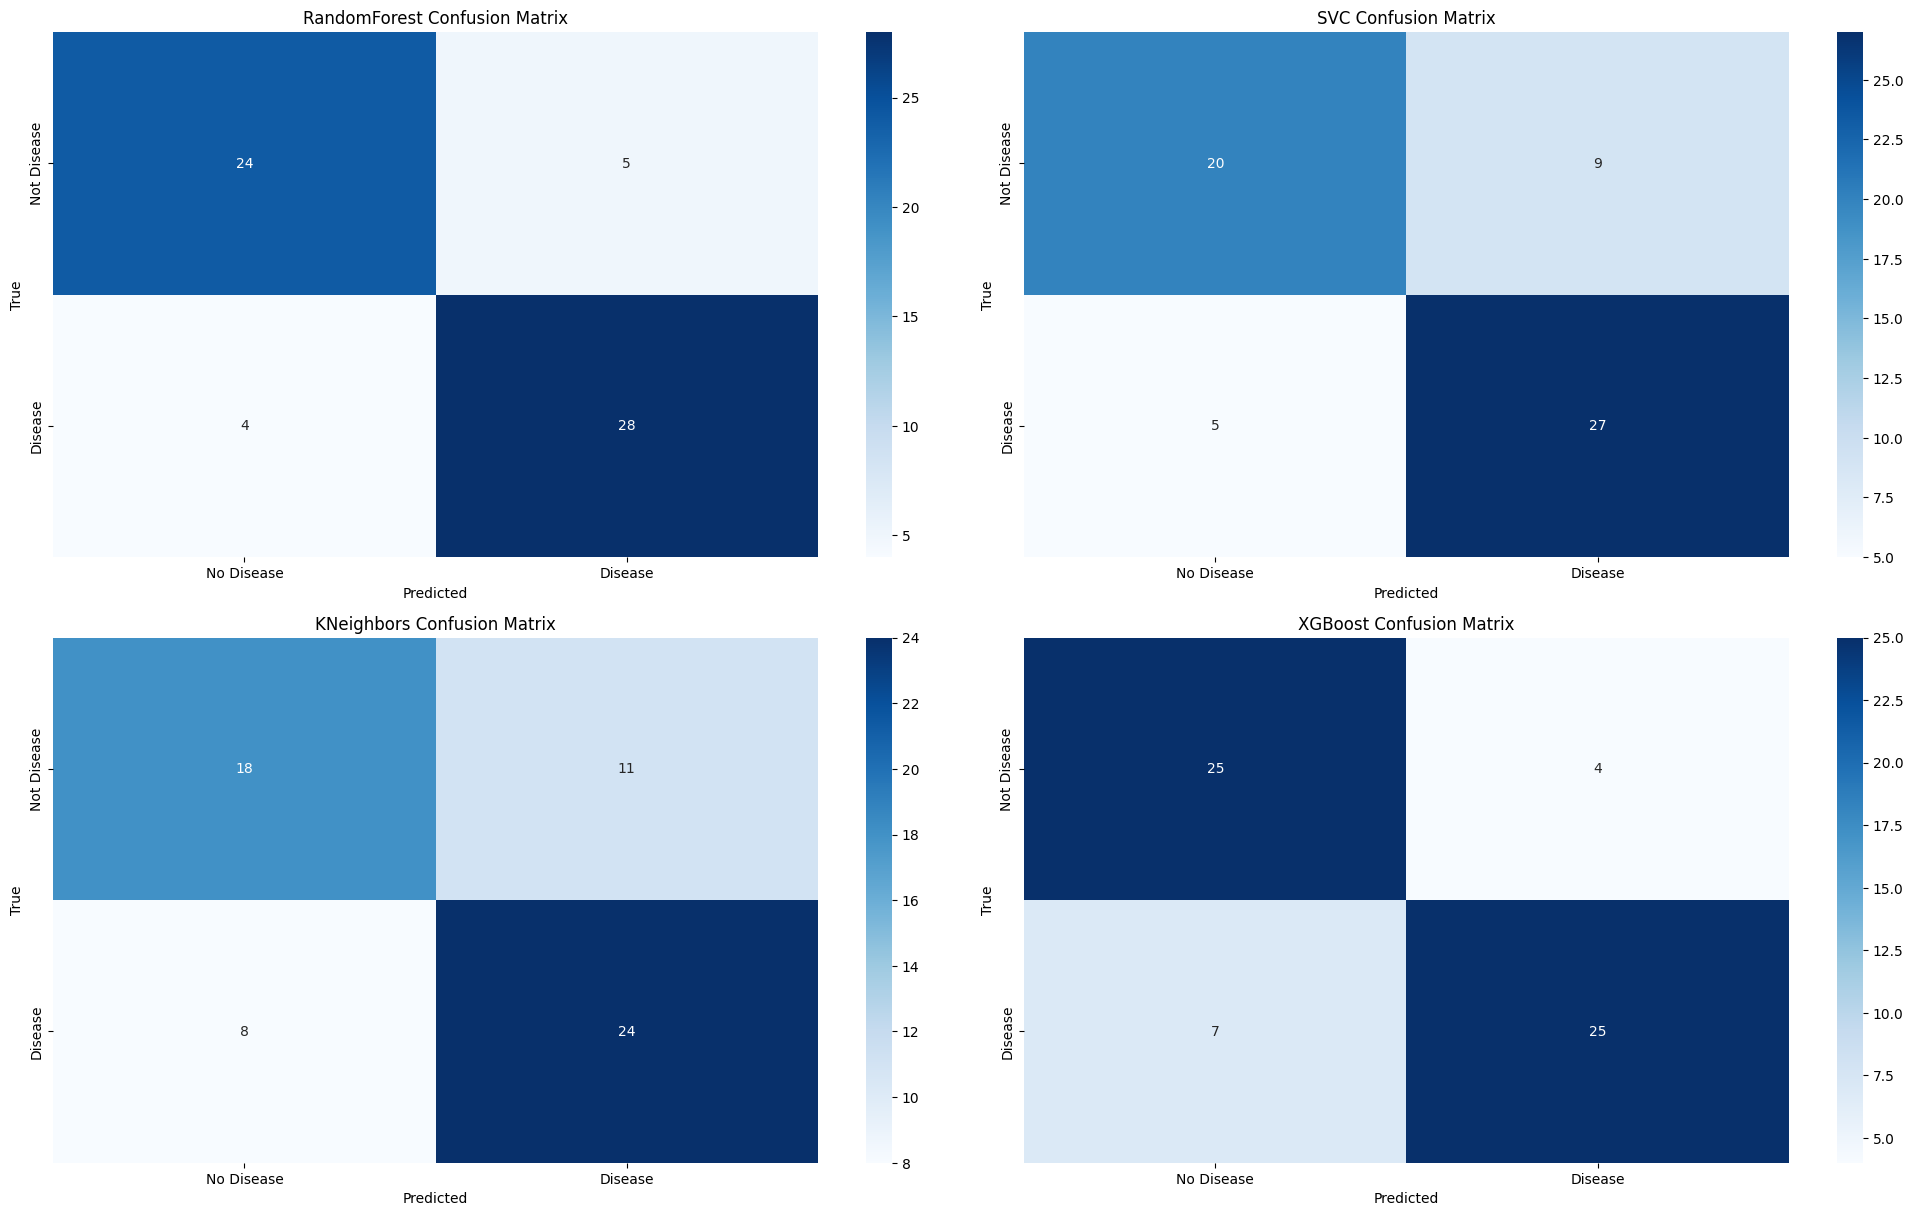

In [7]:
plt.figure(figsize=(20, 30))
for i, (name, model) in enumerate(models.items(), 1):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    ac = accuracy_score(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    results[name] = {'accuracy score': ac, 'classification report': cr}
    plt.subplot(5, 2, i)
    cm = confusion_matrix(y_test,y_pred)
    plt.Figure(figsize=(10,7))
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['No Disease', 'Disease'], yticklabels=['Not Disease', 'Disease'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
plt.tight_layout()
plt.show()

In [9]:
result_df = pd.DataFrame(results).T
print(result_df)

             accuracy score                              classification report
RandomForest       0.852459                precision    recall  f1-score   ...
SVC                0.770492                precision    recall  f1-score   ...
KNeighbors         0.688525                precision    recall  f1-score   ...
XGBoost            0.819672                precision    recall  f1-score   ...
